In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('heart.csv')

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 1. Define business problems, metrics, goals

Pada dataset ini memberkan informasi mengenai pasien yang memiliki penyakit jantung, sehingga berikut beberapa paparan atau poinnya:

Business Problems:
1.   Mengetahui relasi antara beberapa variabel dengan perkembangan penyakit jantung
2.   Mengidentifikasi pasien yang berisiko tinggi terkena penyakit jantung

Metrics:
1.   tidak tahu

Goals:
1.   Membuat model untuk memprediksi resiko pasien terkena serangan jantung





### 2.Define the workflow you would use if you’re a data scientist working in this case 


*   Langkah pertama yaitu melakukan data preparation, karena langkah inilah yang gunanya untuk menyiapkan data sebelum dilakukannya analisis
*   Kedua adalah EDA, pada tahap ini dilakukan eksplorasi data yang gunanya untuk mengetahui isi variabel, relasi antar variabel dan persebaran datanya. Dan juga melakukan handling terhadap missing values ataupun outliers
*   ketiga, Melakukan penambahan fitur atau feature engineering, hal ini dilakukan untuk membuat variabel baru guna menambah akurasi dari pemodelan yang akan dibuat
*   Keempat, Membuat pemodelan atau model machine learning. Setelah datanya dilakukan EDA maka data tersebut sudah siap untuk dilakukan pemodelan
*   Kelima, melakukan evaluasi dari model yang sudah dibuat





### 3.Check the quality of the dataset (missing value, duplicates, outliers, data imbalance)

In [37]:
df.shape

(1025, 14)

In [38]:
#mengecek missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak terdapat sama sekali missing value

In [39]:
#mengecek data duplikat
df.duplicated().sum()

723

Terdapat 723 data yang duplikat (lebih dari 50%)

In [40]:
# Dropping the duplicated rows
df.drop_duplicates(inplace=True)

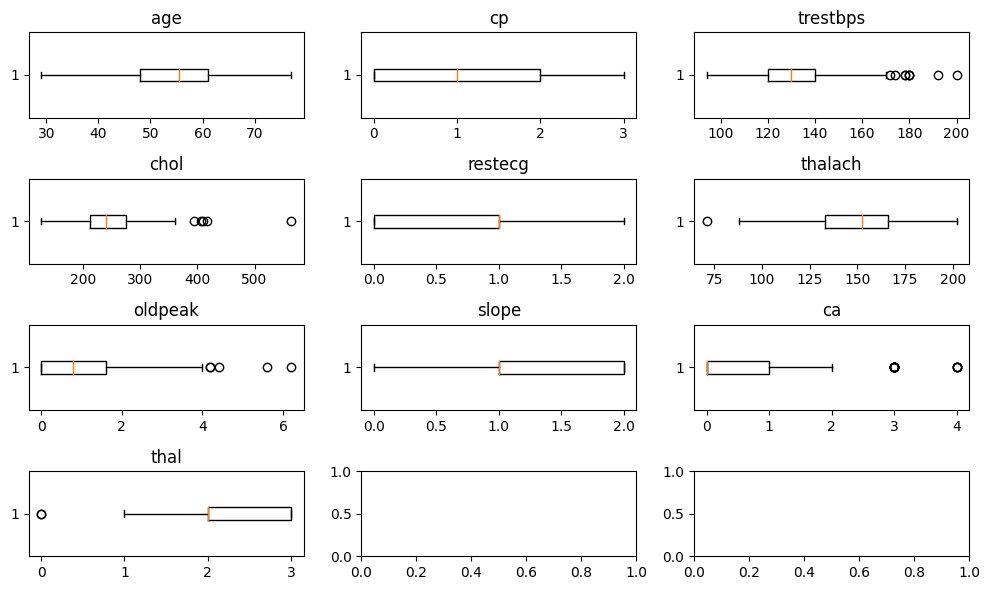

In [41]:
#outliers
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 6))
for ax, column in zip(axes.ravel(), ['age', 'cp', 'trestbps', 'chol','restecg','thalach',
                                    'oldpeak','slope','ca','thal']):
    ax.boxplot(df[column], vert=False)
    ax.set_title(column)
plt.tight_layout()
plt.show()

Terdapat ouliers yang cukup terlihat yaitu trestbps, chol, oldpeak

In [42]:
for i in (df.columns):
  if(df[i].dtypes in['int64','float64']):
    print(i,':',df[i].dtypes)

    Q1 = df[i].quantile(0.25)
    print('Q1',Q1)

    Q3 = df[i].quantile(0.75)
    print('Q3',Q3)

    IQR = Q3-Q1
    print('IQR',IQR)

    nilai_min = df[i].min()
    nilai_max = df[i].max()

    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR

    #Mencari Outlier
    if(nilai_min < min_IQR):
      print('Low outlier is found<', min_IQR)
      print('Low outlier Index :', list(df[df[i] < min_IQR].index))

    if(nilai_max > max_IQR):
      print('High outlier is found>', max_IQR)
      print('High outlier Index :', list(df[df[i] > max_IQR].index))

    print('\n')

age : int64
Q1 48.0
Q3 61.0
IQR 13.0


sex : int64
Q1 0.0
Q3 1.0
IQR 1.0


cp : int64
Q1 0.0
Q3 2.0
IQR 2.0


trestbps : int64
Q1 120.0
Q3 140.0
IQR 20.0
High outlier is found> 170.0
High outlier Index : [29, 47, 87, 137, 151, 175, 343, 396, 528]


chol : int64
Q1 211.0
Q3 274.75
IQR 63.75
High outlier is found> 370.375
High outlier Index : [123, 158, 179, 255, 450]


fbs : int64
Q1 0.0
Q3 0.0
IQR 0.0
High outlier is found> 0.0
High outlier Index : [1, 4, 11, 14, 19, 27, 28, 47, 49, 50, 63, 66, 72, 74, 76, 89, 94, 101, 114, 123, 135, 148, 154, 171, 175, 185, 193, 210, 228, 240, 244, 269, 292, 343, 348, 356, 363, 389, 396, 555, 570, 580, 629, 708, 719]


restecg : int64
Q1 0.0
Q3 1.0
IQR 1.0


thalach : int64
Q1 133.25
Q3 166.0
IQR 32.75
Low outlier is found< 84.125
Low outlier Index : [267]


exang : int64
Q1 0.0
Q3 1.0
IQR 1.0


oldpeak : float64
Q1 0.0
Q3 1.6
IQR 1.6
High outlier is found> 4.0
High outlier Index : [6, 13, 54, 69, 528]


slope : int64
Q1 1.0
Q3 2.0
IQR 1.0


ca : int6

Outlier Handle dengan mengambil ambang batas 90 (percentile 0.90) hal ini dikarenakan jumlah row yang sedikit

In [43]:
#trestbps
Q1_trestbps  = df['trestbps'].quantile(0.25)
Q3_trestbps  = df['trestbps'].quantile(0.90)
IQR_trestbps  = Q3_trestbps  - Q1_trestbps 

In [44]:
outliers_trestbps = (df['trestbps'] < (Q1_trestbps - 1.5 * IQR_trestbps)) | (df['trestbps'] > (Q3_trestbps + 1.5 * IQR_trestbps))


In [45]:
 df = df.loc[~outliers_trestbps]

In [46]:
Q1_chol  = df['chol'].quantile(0.25)
Q3_chol  = df['chol'].quantile(0.90)
IQR_chol  = Q3_chol  - Q1_chol

In [47]:
outliers_chol = (df['chol'] < (Q1_chol - 1.5 * IQR_chol)) | (df['chol'] > (Q3_chol + 1.5 * IQR_chol))


In [48]:
 df = df.loc[~outliers_chol]

In [49]:
Q1_oldpeak  = df['oldpeak'].quantile(0.25)
Q3_oldpeak  = df['oldpeak'].quantile(0.90)
IQR_oldpeak  = Q3_oldpeak  - Q1_oldpeak 

In [50]:
outliers_oldpeak = (df['oldpeak'] < (Q1_oldpeak - 1.5 * IQR_oldpeak)) | (df['oldpeak'] > (Q3_oldpeak + 1.5 * IQR_oldpeak))


In [51]:
 df = df.loc[~outliers_oldpeak]

In [52]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [53]:
#data imbalance
#menghitung jumlah data pada setiap kelas target
target_count = df['target'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 138
Class 1: 163
Proportion: 0.85 : 1


### 4. Check the descriptive statistics of the dataset (mean, distributions, etc)

In [54]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.684385,0.960133,131.657807,245.445183,0.149502,0.528239,149.534884,0.328904,1.041196,1.398671,0.720930,2.312292,0.541528
std,9.033793,0.465534,1.032023,17.566422,48.479011,0.357176,0.526023,22.933737,0.470597,1.162940,0.616872,1.007568,0.612766,0.499102
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 5. Check the correlation between features

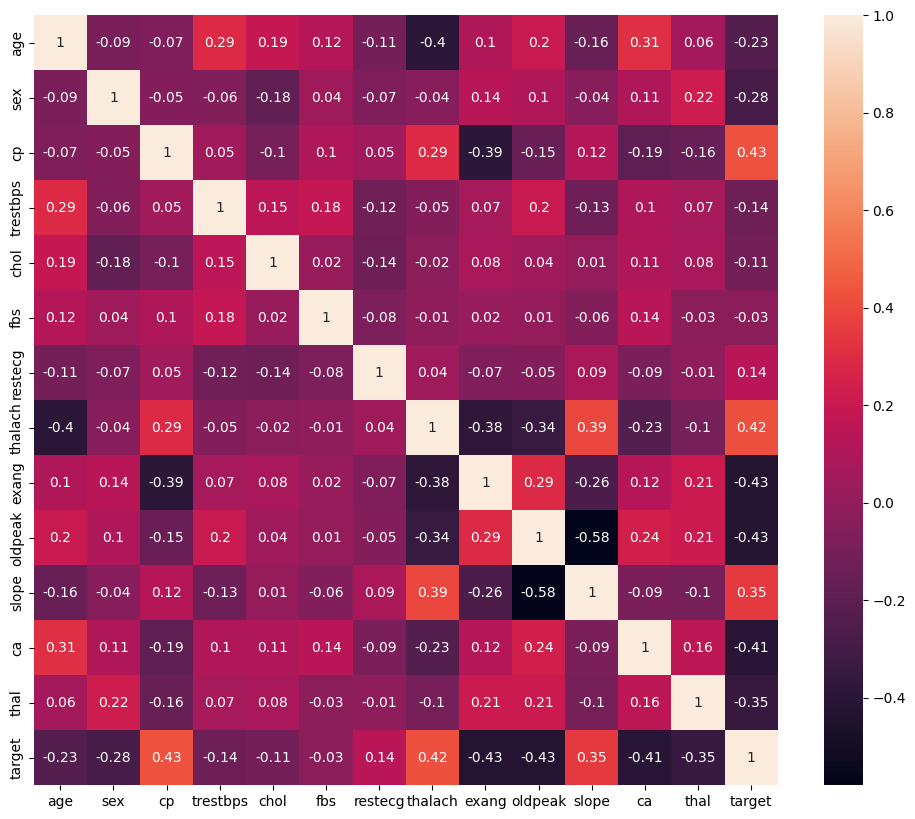

In [55]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(round(correlation_matrix,2), annot=True)
plt.show()


Berdasarkan visualisasi diatas, bahwa ternyata usia memiliki korelasi negatif terhadap target. Ada beberapa variabel yang memiliki positif correlation terhadap target seperti (cp, restecg, thalach, and slope) 

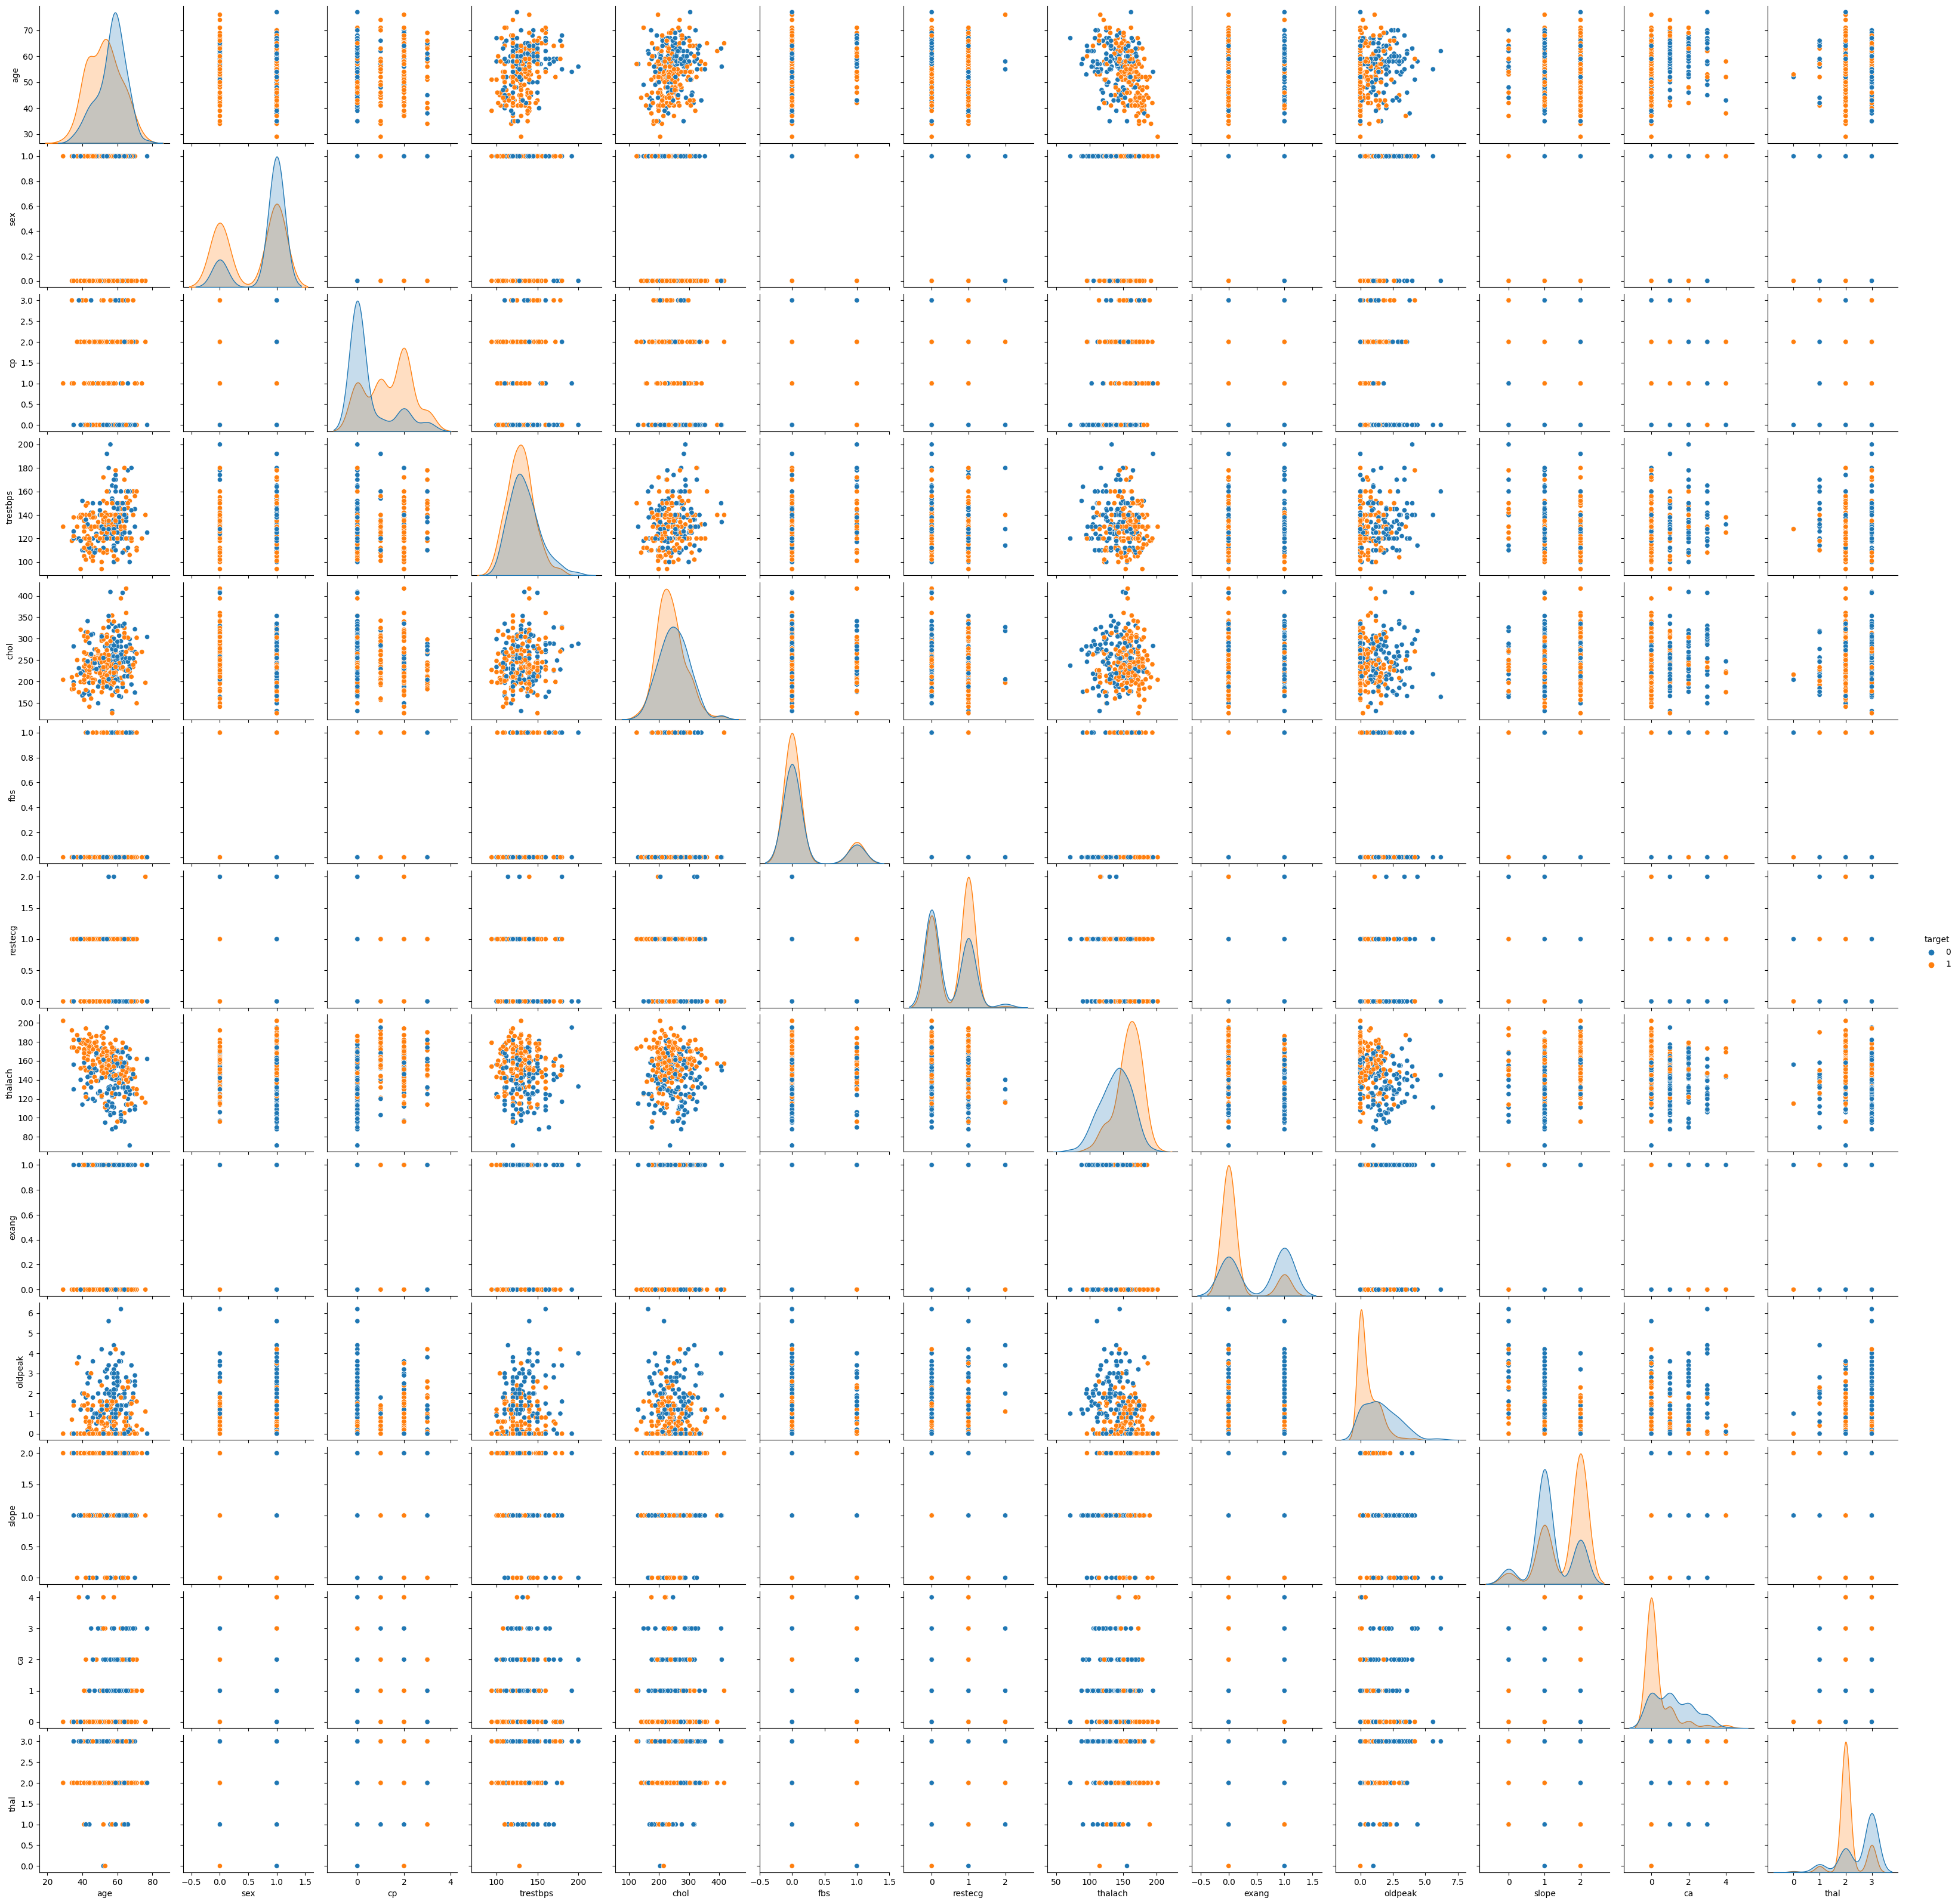

In [23]:
sns.pairplot(df, hue='target')

### 6. Visualize points 4 and 5

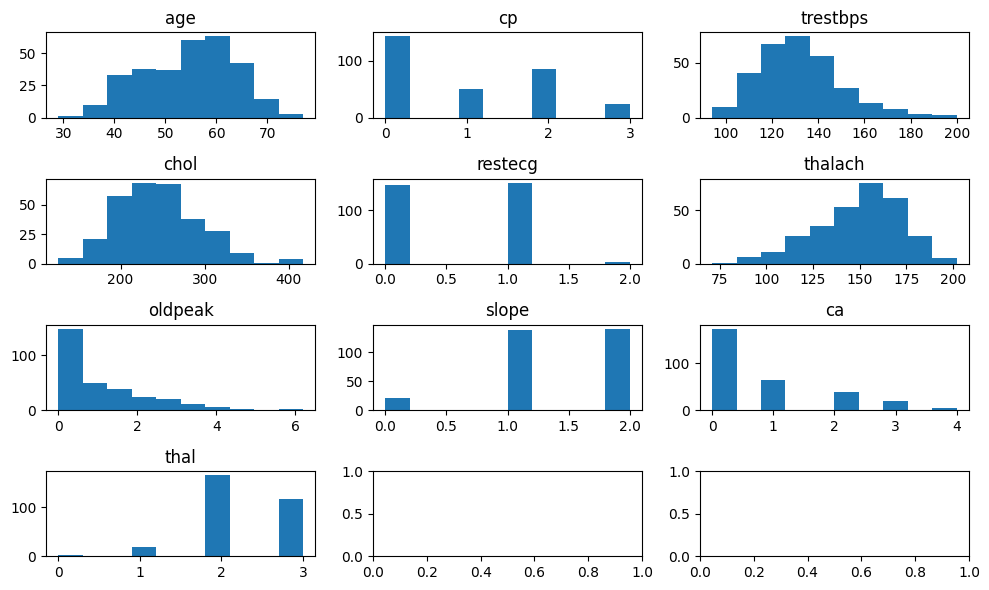

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 6))
for ax, column in zip(axes.ravel(), ['age', 'cp', 'trestbps', 'chol','restecg','thalach',
                                    'oldpeak','slope','ca','thal']):
    ax.hist(df[column])
    ax.set_title(column)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gender vs target\n')

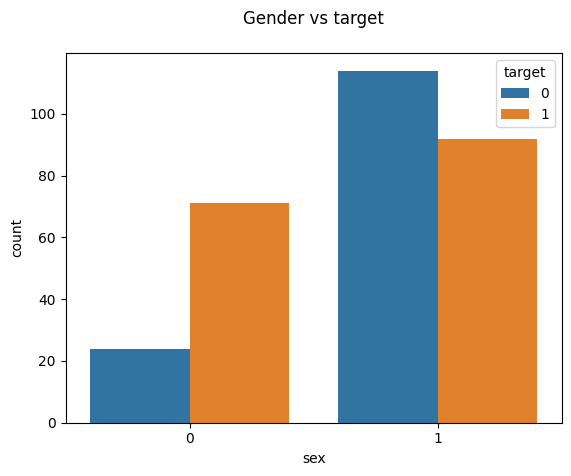

In [25]:
sns.countplot(data= df, x='sex',hue='target')
plt.title('Gender vs target\n')

Text(0.5, 1.0, 'Chest Pain Type vs target\n')

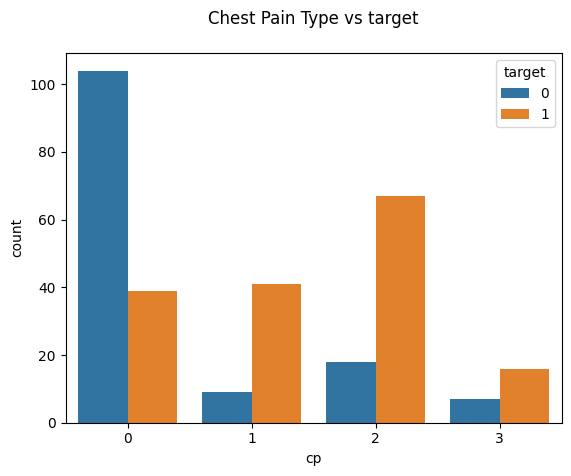

In [26]:
sns.countplot(data= df, x='cp',hue='target')
plt.title('Chest Pain Type vs target\n')

Text(0.5, 1.0, 'Chest Pain Type vs target\n')

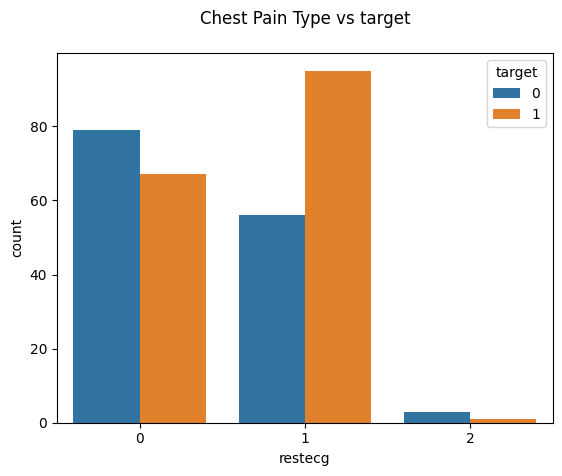

In [27]:
sns.countplot(data= df, x='restecg',hue='target')
plt.title('Chest Pain Type vs target\n')

Text(0.5, 1.0, 'Chest Pain Type vs target\n')

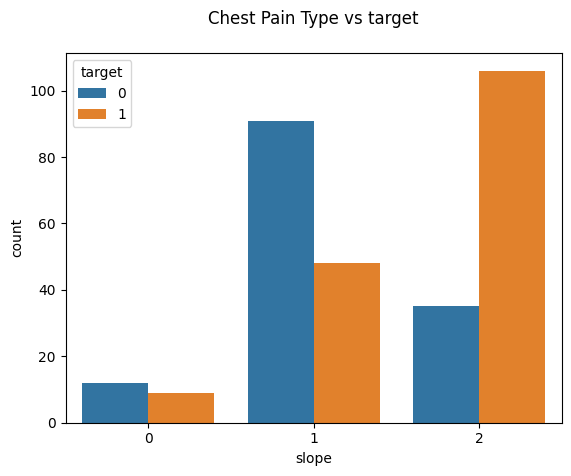

In [28]:
sns.countplot(data= df, x='slope',hue='target')
plt.title('Chest Pain Type vs target\n')

### 7. Define possible feature engineering through encoding

In [29]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Membuat kolom baru katagori berdasarkan umur dengan ('young', 'middle-aged', 'old')

In [30]:
age_bins = [0, 40, 55, 100]
age_labels = ['young', 'middle-aged', 'old']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [31]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,middle-aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,middle-aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,old
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,old
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,old
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,middle-aged
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,middle-aged
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,old


### 8. Automate EDA through Dataprep, Autovis, Dtale, etc.

In [32]:
# !pip install pandas-profiling

In [33]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')
# prof.to_widgets()

1. Create the hypothesis from the models you will create. 
2. Choose at least 2 models from the live session (or any other you know) and justify why you think it would be beneficial for you to choose the model for the dataset. 
3. Do cross validation and bootstrapping
4. Create at least 2 models
5. List the model evaluation you would use to apply in the project and its justification, and evaluate the models you have created. 
6. List the feature importance from the models you have created and derive insights relating to the feature importance. 